# In this notebook I will use the Africa Soil Property Prediction dataset, https://www.kaggle.com/c/afsis-soil-properties/data, from kaggle.com and to to use all the measurements provided to predict the soil's ability to support growth.  There are five target variables that determine the quality of soil, pH levels, Ca - calcium , SOC - soil organic, P - phosphorus, and sand content.  This data was monotonously transfromed from the original data so it contains negative values but the original order of the numbers is preserved.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(7)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('training.csv')
df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0  XNhoFZW5  0.302553  0.301137  0.299748  0.300354  0.302679  0.303799   
1  9XNspFTd  0.270192  0.268555  0.266964  0.267938  0.271013  0.272346   
2  WDId41qG  0.317433  0.316265  0.314948  0.315224  0.316942  0.317764   
3  JrrJf1mN  0.261116  0.259767  0.258384  0.259001  0.261310  0.262417   
4  ZoIitegA  0.260038  0.258425  0.256544  0.257030  0.259602  0.260786   

   m7486.39  m7484.46  m7482.54  m7480.61  m7478.68  m7476.75  m7474.82  \
0  0.301702  0.298936  0.298126  0.298120  0.298163  0.299124  0.300828   
1  0.269870  0.266976  0.266544  0.266766  0.266464  0.266817  0.268150   
2  0.316067  0.313874  0.313301  0.313296  0.313051  0.313306  0.314301   
3  0.260534  0.258039  0.257246  0.257124  0.257018  0.257568  0.258724   
4  0.258717  0.256352  0.255902  0.255822  0.255720  0.256521  0.257968   

   m7472.89  m7470.97  m7469.04  m7467.11  m7465.18  m7463.25  m7461.32  \
0  0.302522  0.303633  0.303364  0.302018  0.301226  0.300803  0.299270   
1  0.269933  0.271409  0.271396  0.270126  0.269351  0.268984  0.267680   
2  0.315640  0.316764  0.316759  0.315631  0.314860  0.314275  0.312711   
3  0.260107  0.261175  0.261028  0.259906  0.259251  0.258669  0.257007   
4  0.259571  0.260714  0.260465  0.259352  0.258872  0.258484  0.257105   

   m7459.39  m7457.47  m7455.54  m7453.61  m7451.68  m7449.75  m7447.82  \
0  0.297354  0.296703  0.297569  0.298991  0.299680  0.299230  0.298567   
1  0.265901  0.265088  0.265679  0.266744  0.267202  0.266808  0.266266   
2  0.311094  0.310565  0.311120  0.312103  0.312638  0.312326  0.311623   
3  0.255397  0.255119  0.256042  0.257195  0.257301  0.256440  0.256007   
4  0.255502  0.254720  0.255194  0.256394  0.257036  0.256583  0.255867   

   m7445.89  m7443.97  m7442.04  m7440.11  m7438.18  m7436.25  m7434.32  \
0  0.298865  0.299278  0.298186  0.296781  0.296565  0.296190  0.294805   
1  0.266768  0.267507  0.266740  0.265624  0.265355  0.264461  0.262806   
2  0.311752  0.312137  0.311122  0.309909  0.309824  0.309471  0.308209   
3  0.256729  0.257216  0.256001  0.254599  0.254345  0.253791  0.252452   
4  0.256101  0.256414  0.255297  0.254055  0.253889  0.253455  0.252198   

    m7432.4  m7430.47  m7428.54  m7426.61  m7424.68  m7422.75  m7420.82  \
0  0.293779  0.293980  0.295162  0.297448  0.300198  0.301303  0.300673   
1  0.262251  0.263087  0.264431  0.266533  0.269126  0.270218  0.269696   
2  0.307262  0.307201  0.307804  0.309592  0.312165  0.313208  0.312585   
3  0.251695  0.252027  0.253043  0.254901  0.257175  0.258014  0.257320   
4  0.251296  0.251400  0.252441  0.254763  0.257593  0.258576  0.257769   

    m7418.9  m7416.97  m7415.04  m7413.11  m7411.18  m7409.25  m7407.33  \
0  0.299845  0.298458  0.296466  0.295371  0.295377  0.295597  0.296088   
1  0.269164  0.268218  0.266475  0.265322  0.265160  0.265286  0.265868   
2  0.311902  0.310632  0.308591  0.307199  0.306786  0.306762  0.307167   
3  0.256478  0.255183  0.253396  0.252258  0.251833  0.251592  0.251848   
4  0.256862  0.255310  0.253043  0.251976  0.252410  0.252935  0.253434   

    m7405.4  m7403.47  m7401.54  m7399.61  m7397.68  m7395.75  m7393.83  \
0  0.297508  0.298845  0.298502  0.297207  0.296323  0.295997  0.296000   
1  0.267376  0.268596  0.268155  0.267009  0.266364  0.266274  0.266614   
2  0.308456  0.309540  0.308847  0.307330  0.306524  0.306311  0.306280   
3  0.253228  0.254616  0.254272  0.252928  0.252066  0.251909  0.252239   
4  0.254792  0.255975  0.255312  0.253673  0.252535  0.252158  0.252458   

    m7391.9  m7389.97  m7388.04  m7386.11  m7384.18  m7382.25  m7380.33  \
0  0.296084  0.296161  0.296397  0.297118  0.298939  0.300937  0.301304   
1  0.266895  0.266874  0.267003  0.267717  0.269512  0.271594  0.272229   
2  0.306303  0.306187  0.306099  0.306735  0.308790  0.311103  0.311589   
3  0.252529  0.252412  0.252231  0.252603  0.254167  0.256070  0.256690   
4  0.252913  0.253079  0

# EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Columns: 3600 entries, PIDN to Sand
dtypes: float64(3598), int64(1), object(1)
memory usage: 31.8+ MB


In [3]:
df.isnull().sum()

PIDN        0
m7497.96    0
m7496.04    0
m7494.11    0
m7492.18    0
           ..
Ca          0
P           0
pH          0
SOC         0
Sand        0
Length: 3600, dtype: int64

# Using linear regression to check the relationship between all the mid-infrared absorbance measurements and each target variable.

In [4]:
#Removing some of the non infrared measurements improved the r2 score a little
X = df.drop(['PIDN', 'SOC', 'pH', 'Ca', 'P', 'Sand', 'CTI', 'ELEV', 'EVI', 'LSTD', 'LSTN', 'RELI', 'TMAP', 'TMFI', 'Depth'],
            axis=1)
sand = df.Sand
phosphorus = df.P
calcium = df.Ca
ph = df.pH
soil_content = df.SOC

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, sand, test_size=0.30, random_state=42)
X_train, X_test, y_train2, y_test2 = train_test_split( X, phosphorus, test_size=0.30, random_state=42)
X_train, X_test, y_train3, y_test3 = train_test_split( X, calcium, test_size=0.30, random_state=42)
X_train, X_test, y_train4, y_test4 = train_test_split( X, ph, test_size=0.30, random_state=42)
X_train, X_test, y_train5, y_test5 = train_test_split( X, soil_content, test_size=0.30, random_state=42)

In [6]:
#Scaling data to improve computing time
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)
lr.fit(X_train, y_train2)
lr.fit(X_train, y_train3)
lr.fit(X_train, y_train4)
lr.fit(X_train, y_train5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
pred =lr.predict(X_test)
pred2 =lr.predict(X_test)
pred3 =lr.predict(X_test)
pred4 =lr.predict(X_test)
pred5 =lr.predict(X_test)

No handles with labels found to put in legend.


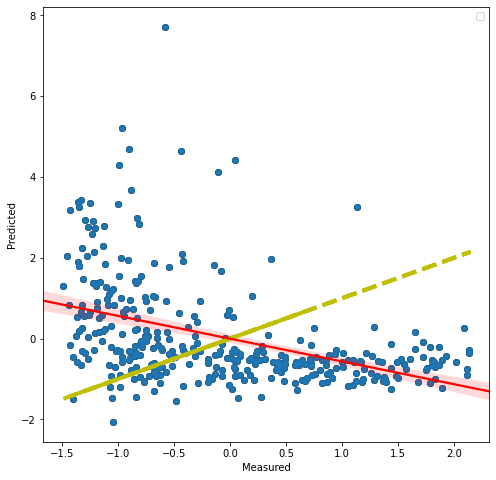

In [10]:
#Relationship with sand content
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))
ax.plot(y_test, y_test, 'k--', lw=4, color='y')
sns.regplot(x=y_test, y=pred, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

No handles with labels found to put in legend.


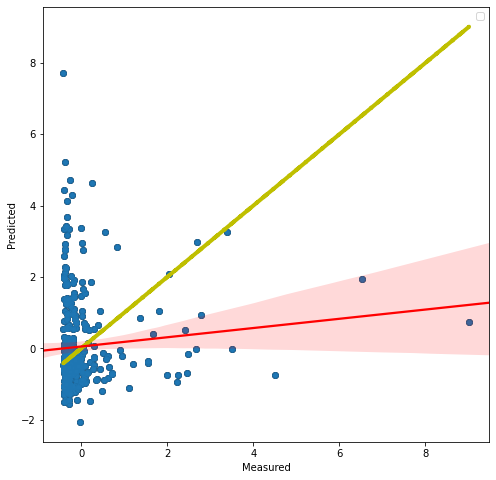

In [11]:
#Relationship with phosphuros
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test2, pred, edgecolors=(0, 0, 0))
ax.plot(y_test2, y_test2, 'k--', lw=4, color='y')
sns.regplot(x=y_test2, y=pred2, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

No handles with labels found to put in legend.


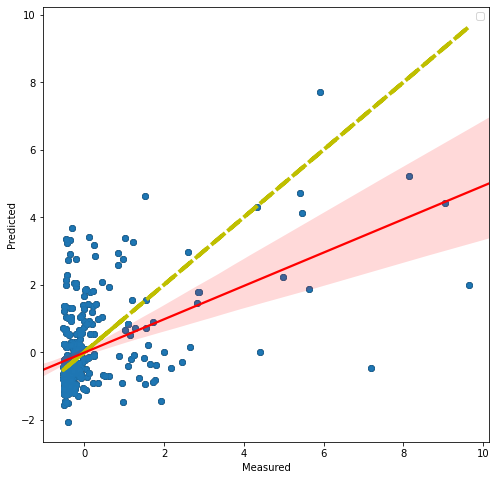

In [12]:
#Relationship with calcium
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test3, pred, edgecolors=(0, 0, 0))
ax.plot(y_test3, y_test3, 'k--', lw=4, color='y')
sns.regplot(x=y_test3, y=pred3, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

No handles with labels found to put in legend.


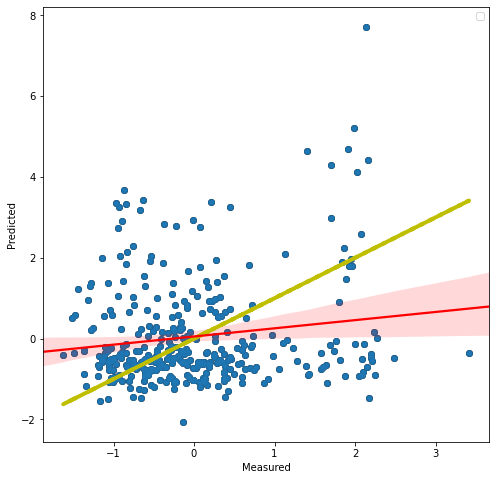

In [13]:
#Relationship with ph levels
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test4, pred, edgecolors=(0, 0, 0))
ax.plot(y_test4, y_test4, 'k--', lw=4, color='y')
sns.regplot(x=y_test4, y=pred4, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

No handles with labels found to put in legend.


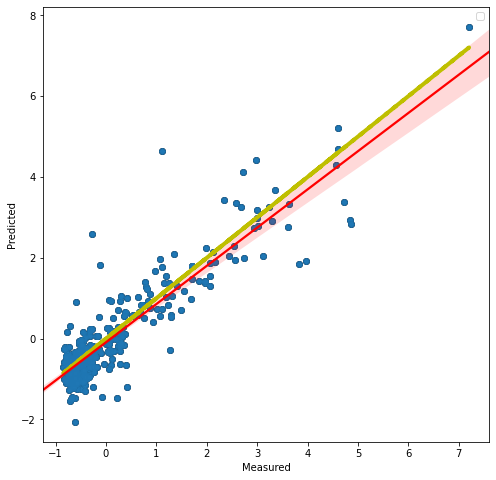

In [14]:
#Relationship with soil content
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test5, pred, edgecolors=(0, 0, 0))
ax.plot(y_test5, y_test5, 'k--', lw=4, color='y')
sns.regplot(x=y_test5, y=pred5, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [16]:
#You want a R2 score as close to 1 as possible and a mean suared error as small as possible

print("R2 score for sand content:",sklearn.metrics.r2_score(y_test, pred))
print("MSE for sand content:",mean_squared_error(y_test, pred))
print("R2 score for phosporus:",sklearn.metrics.r2_score(y_test2, pred2))
print("MSE for phosphorus:",mean_squared_error(y_test2, pred2))
print("R2 score for calcium:",sklearn.metrics.r2_score(y_test3, pred3))
print("MSE for calcium:",mean_squared_error(y_test3, pred3))
print("R2 score for pH:",sklearn.metrics.r2_score(y_test4, pred4))
print("MSE for pH:",mean_squared_error(y_test4, pred4))
print("R2 score for soil content:",sklearn.metrics.r2_score(y_test5, pred5))
print("MSE for soil content:",mean_squared_error(y_test5, pred5))

R2 score for sand content: -2.8757487634948866
MSE for sand content: 3.776572249172343
R2 score for phosporus: -1.8837669023351662
MSE for phosphorus: 2.2686062044473863
R2 score for calcium: 0.048096078827863376
MSE for calcium: 1.7094132000697857
R2 score for pH: -1.4657041180872148
MSE for pH: 2.2230156744422893
R2 score for soil content: 0.791729534857289
MSE for soil content: 0.32060521110498136


# Features m7497.96 - m599.76 are mid-range infrared absorbance measurements.  These measurements are used to determine soil characteristics and to measure the content of important components of the soil like antioxidents.  Measurements for high quality soil can be found at: https://www.no-tillfarmer.com/articles/4595-key-soil-test-measurements-for-productive-soils#:~:text=The%20most%20suitable%20soils%20for,%2C%20copper%2C%20boron%20and%20zinc.

BSA: average long-term Black Sky Albedo measurements from MODIS satellite images (BSAN = near-infrared, BSAS = shortwave, BSAV = visible)
CTI: compound topographic index calculated from Shuttle Radar Topography Mission elevation data
ELEV: Shuttle Radar Topography Mission elevation data
EVI: average long-term Enhanced Vegetation Index from MODIS satellite images.
LST: average long-term Land Surface Temperatures from MODIS satellite images (LSTD = day time temperature, LSTN = night time temperature)
Ref: average long-term Reflectance measurements from MODIS satellite images (Ref1 = blue, Ref2 = red, Ref3 = near-infrared, Ref7 = mid-infrared)
Reli: topographic Relief calculated from Shuttle Radar Topography mission elevation data
TMAP & TMFI: average long-term Tropical Rainfall Monitoring Mission data (TMAP = mean annual precipitation, TMFI = modified Fournier index)

In [17]:
non_infrared = df[['CTI','ELEV','EVI','LSTD','LSTN','RELI','TMAP','TMFI','Depth']]
target = df[['Ca','P','pH','SOC','Sand']]

In [18]:
X_train6, X_test6, y_train6, y_test6 = train_test_split( non_infrared, target, test_size=0.30, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor()
rft.fit(X_train6, y_train6)

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import mean_squared_error
y_pred = rft.predict(X_test6)
print(mean_squared_error(y_test6, y_pred))
print(sklearn.metrics.r2_score(y_test6, y_pred))

0.4212973771555637
0.6051632027405415


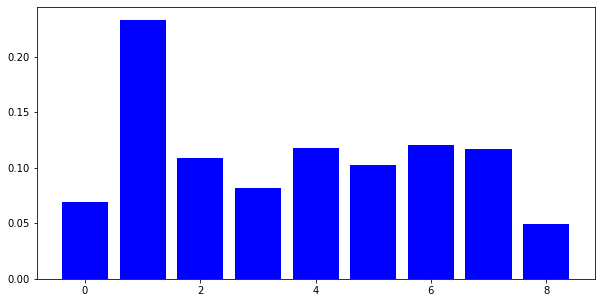

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
bar_rects = ax.bar(np.arange(9), rft.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(9)


# It looks like ELEV, elevation is the most important out of all the non-infrared features when it comes to predicting soil quality. With increasing elevation, pH, base saturation, exchangeable potassium, and fine silt-sized particles decrease significantly - https://link.springer.com/article/10.1007/s11629-015-3773-6#:~:text=With%20increasing%20elevation%2C%20pH%2C%20base,sand%2Dsized%20particles%20increase%20significantly.

In [22]:
non_infrared.head()

,CTI,ELEV,EVI,LSTD,LSTN,RELI,TMAP,TMFI,Depth
0,-0.364146,1.165479,1.062682,-0.716713,-0.090016,1.687734,0.190708,0.056843,0
1,-0.364146,1.165479,1.062682,-0.716713,-0.090016,1.687734,0.190708,0.056843,1
2,-0.633972,1.544098,1.156705,-1.282552,-0.088336,1.806660,0.190708,0.056843,0
3,-0.633972,1.544098,1.156705,-1.282552,-0.088336,1.806660,0.190708,0.056843,1
4,-0.583576,1.276837,1.191691,-1.206971,0.011420,0.430513,0.190708,0.056843,0


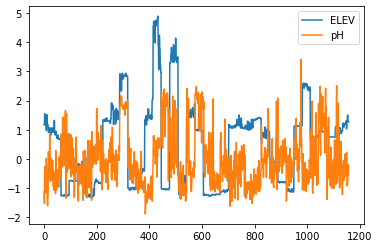

In [23]:
#Doing this small sample by hand I got a r2 score of -1.13, as elevation increases the pH decreases
df['ELEV'].plot()
df['pH'].plot()
plt.legend()

In [24]:
df['ELEV'].head()

0    1.165479
1    1.165479
2    1.544098
3    1.544098
4    1.276837
Name: ELEV, dtype: float64

In [25]:
df['pH'].head()

0   -1.129366
1   -1.531538
2   -0.259551
3   -0.577548
4   -0.699135
Name: pH, dtype: float64

# Classification with Neural Networks

In [26]:
nn = df.drop(['PIDN', 'SOC', 'pH', 'Ca', 'P', 'Sand', 'EVI', 'LSTN', 'RELI', 'Depth', 'TMFI'], axis=1)

In [27]:
X_train, X_test, y_train7, y_test7 = train_test_split( nn,
                                                      target, test_size=0.30, random_state=42)

In [28]:
import keras
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


In [29]:
from keras.layers import Dense
np.random.seed(7)
#first layer
#Relu maps inputs to 0 or 1
#Input_dim = 9 because of 9 predictors
#128 - number of nodes
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))

In [30]:
#outputlayer
#softmax is a form of logistic regression - turns real values into probabilities
model.add(Dense(5, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train7, epochs=78)

Epoch 1/78
809/809 [==============================] - 1s 657us/step - loss: 1.0271 - accuracy: 0.2621
Epoch 2/78
809/809 [==============================] - 0s 296us/step - loss: 0.9762 - accuracy: 0.4302
Epoch 3/78
809/809 [==============================] - 0s 294us/step - loss: 0.9432 - accuracy: 0.5785
Epoch 4/78
809/809 [==============================] - 0s 296us/step - loss: 0.9385 - accuracy: 0.6007
Epoch 5/78
809/809 [==============================] - 0s 288us/step - loss: 0.8980 - accuracy: 0.5896
Epoch 6/78
809/809 [==============================] - 0s 301us/step - loss: 0.8940 - accuracy: 0.5884
Epoch 7/78
809/809 [==============================] - 0s 381us/step - loss: 0.8804 - accuracy: 0.5859
Epoch 8/78
809/809 [==============================] - 0s 361us/step - loss: 0.8790 - accuracy: 0.5735
Epoch 9/78
809/809 [==============================] - 0s 354us/step - loss: 0.8681 - accuracy: 0.6069
Epoch 10/78
809/809 [==============================] - 0s 340us/step - loss: 0.858

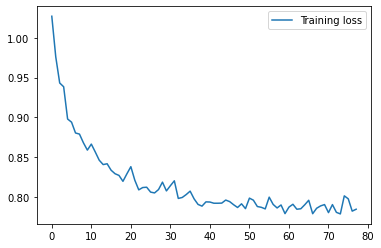

In [33]:
loss = model.history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

# Randomly selecting a sample to match with my predictions

In [34]:
predictions = model.predict(X_test)

In [35]:
predictions[93]

array([0.09578621, 0.07664616, 0.00194659, 0.8230663 , 0.00255471],
      dtype=float32)

In [36]:
target.iloc[93]

Ca     -0.357071
P      -0.331848
pH     -0.156670
SOC    -0.545316
Sand    0.017587
Name: 93, dtype: float64

In [37]:
predictions[5]

array([0.02902572, 0.3559466 , 0.00875902, 0.5182231 , 0.08804557],
      dtype=float32)

In [38]:
target.iloc[5]

Ca     -0.312526
P       0.256092
pH     -0.914251
SOC    -0.685962
Sand    1.943402
Name: 5, dtype: float64

In [39]:
predictions[40]

array([3.3213649e-07, 2.9704319e-03, 6.2916346e-04, 1.4563454e-05,
       9.9638546e-01], dtype=float32)

In [40]:
target.iloc[40]

Ca     -0.473349
P      -0.055170
pH     -0.942309
SOC     2.564532
Sand   -0.709351
Name: 40, dtype: float64

# It is clear to see that these measurements can help predict soil quality, ecspecially the mid-range infrared measurements.  This can help farmers produce more crops. By 2050, the world population is expected to reach 8.5 billion and there will not be enough food for everyone.

# 1. EDA

# Linear regression - all the mid-range IR measurements are most correlated with soil content.

# Regression tree - out of all no IR measurements, elevation had the biggest impact on soil quality.


# 2. Neural Network - achieved 72% accuracy predicting soil quality.